# Overview

This week's curriculum focuses in figuring out (and visualizing) what's special about a certain text (or collection of texts). We'll also learn about community detection in networks (that's how we'll get our groups of text)

* Tricks for raw text (NLPP, Chapter 3). 
* Identifying important words in a document (TF-IDF)
* Community Detection

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the second part we will go back to network science, discussing community detection and trying it out on our very own dataset.


# Part 1: Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

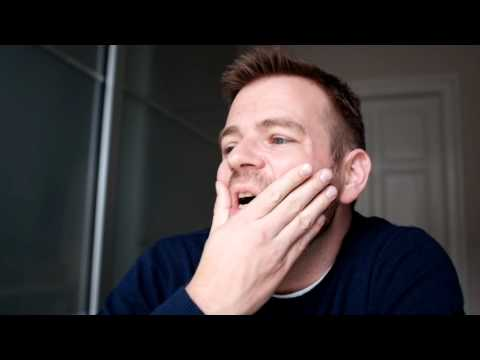

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Part 2: Words that characterize the universes

Now, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

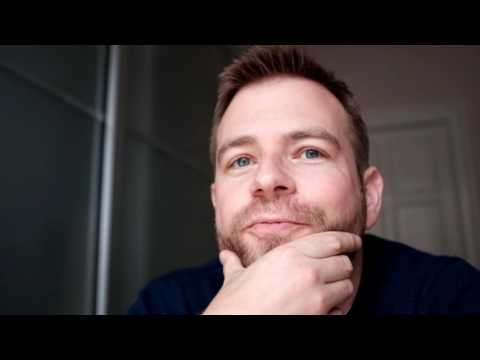

In [2]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

Now, we'll learn about the wiki-pages we've downloaded. 

_Exercise_ 1: Comparing word-counts of Marvel and DC heroes. 

*Setup*. You'll need to go to your archives and find the wikipedia pages of all the superheroes. 

Once you have the texts ready, you will want to aggregate the text into two long lists (let's call them two documents). One based on all the text from the Marvel pages, and one based on all the text from the DC pages. In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. For example, a Marvel list could contain entries along the lines of:

```
...

wolverine 452
avenger 129
mutant 630

...
```
This list is called a ***Term Frequency*** (or TF) list. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into individual strings
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words

If you are confused by the instructions for cleaning, go back and have a  look Chapter 3 again. 

> *Action item*: 
> * Create your TF list for each universe.
> * List the top 15 words for each universe.
> * Comment on the top 15 words for each universe.

In [166]:
import readline
import networkx as nx
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wikipedia
import random
from urllib.request import urlopen
from bs4 import BeautifulSoup
import lxml
import urllib3
import powerlaw
import string
from collections import Counter
import community
from fa2 import ForceAtlas2
import nltk
from nltk.corpus import stopwords
import math

In [15]:
path_dc = "/Users/luchengliang/Social_Graph_and_Networks/DC"
path_marvel = "/Users/luchengliang/Social_Graph_and_Networks/Marvel"

dir_list_dc = []
dir_list_marvel = []

for file in os.listdir(path_dc):
    if file.endswith(".txt"):
        dir_list_dc.append(file)

for file in os.listdir(path_marvel):
    if file.endswith(".txt"):
        dir_list_marvel.append(file)

combine_dir = dir_list_dc + dir_list_marvel

print("The number of charaters in DC: ", len(dir_list_dc))
print("The number of charaters in DC: ", len(dir_list_marvel))
print("The number of charaters of all: ", len(combine_dir))

#Get rid of ".txt" and change "\\" to "/"
dir_purelist_dc = []
dir_purelist_marvel = []
for x in dir_list_dc:
    x = x.replace(".txt", "")
    x = x.replace("\\", "/")
    dir_purelist_dc.append(x)

for y in dir_list_marvel:
    y = y.replace(".txt", "")
    y = y.replace("\\", "/")
    dir_purelist_marvel.append(y)

combine_puredir = dir_purelist_dc + dir_purelist_marvel
print(combine_puredir[:5])


The number of charaters in DC:  760
The number of charaters in DC:  2357
The number of charaters of all:  3117
['Garguax', 'Gentleman_Ghost', 'Blackrock', 'Horten_Spence', 'Black_Condor']


**DC**

In [16]:
wiki_path = "https://en.wikipedia.org/wiki/"
string_dc = ""
for ca in dir_purelist_dc:
    try:
        source = urlopen(wiki_path + ca).read()
        soup = BeautifulSoup(source, "html.parser")
        #print(set([text.parent.name for text in soup.find_all(text=True)])) #print everything configuration in the "soup"

        # Extract the plain text content from paragraphs
        text = ''
        for paragraph in soup.find_all('p'):
            text += paragraph.text

        #Drop footnote and "\n" in the paragraph
        text = re.sub(r'\[.*?\]+', '', text)
        text = text.replace('\n', '')
        text = text.translate(str.maketrans('', '', string.punctuation))
        string_dc += text
    except:
        pass

In [17]:
#Change all to lowercase
string_dc_lower = [w.lower() for w in string_dc]
string_dc_lower = ''.join(string_dc_lower)
string_dc_lower = string_dc_lower.split()
print(string_dc_lower[:5])

['the', 'galactic', 'golem', 'is', 'a']


In [18]:
TF_DC = Counter(string_dc_lower)
TF_DC = {k: v for k, v in sorted(dict(TF_DC).items(), key=lambda item: item[1], reverse=True)}
TF_DC = list(TF_DC.items())
print(TF_DC[:15])

[('the', 117869), ('of', 54301), ('and', 53972), ('to', 53733), ('a', 43862), ('in', 41412), ('is', 23319), ('his', 22256), ('he', 20336), ('by', 19878), ('was', 19285), ('as', 18808), ('with', 16387), ('that', 15068), ('her', 13273)]


It's not quite surprising that the top common appearance 15 words are the stop words since they are necessary for our grammar, however, with little important Information.

**Marvel**

In [19]:
wiki_path = "https://en.wikipedia.org/wiki/"
string_marvel = ""
for ca in dir_purelist_marvel:
    try:
        source = urlopen(wiki_path + ca).read()
        soup = BeautifulSoup(source, "html.parser")
        #print(set([text.parent.name for text in soup.find_all(text=True)])) #print everything configuration in the "soup"

        # Extract the plain text content from paragraphs
        text = ''
        for paragraph in soup.find_all('p'):
            text += paragraph.text

        #Drop footnote and "\n" in the paragraph
        text = re.sub(r'\[.*?\]+', '', text)
        text = text.replace('\n', '')
        text = text.translate(str.maketrans('', '', string.punctuation))
        string_marvel += text
    except:
        pass

In [20]:
string_marvel_lower = [w.lower() for w in string_marvel]
string_marvel_lower = ''.join(string_marvel_lower)
string_marvel_lower = string_marvel_lower.split()
print(string_marvel_lower[:5])

['dr', 'henry', 'jonathan', 'hank', 'pym']


In [21]:
TF_Marvel = Counter(string_marvel_lower)
TF_Marvel = {k: v for k, v in sorted(dict(TF_Marvel).items(), key=lambda item: item[1], reverse=True)}
TF_Marvel = list(TF_Marvel.items())
print(TF_Marvel[:15])

[('the', 420942), ('and', 201411), ('to', 193809), ('of', 181817), ('a', 143609), ('in', 124027), ('is', 76052), ('his', 73587), ('by', 73430), ('he', 68595), ('was', 67337), ('as', 60165), ('with', 60097), ('that', 51449), ('her', 43150)]


It's not quite surprising that the top common appearance 15 words are the stop words since they are necessary for our grammar, however, with little important Information.

# Part 3: Visualization

**Step 1: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step 2: Draw some wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each universe. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)
> 

In [29]:
from wordcloud import WordCloud

**DC**

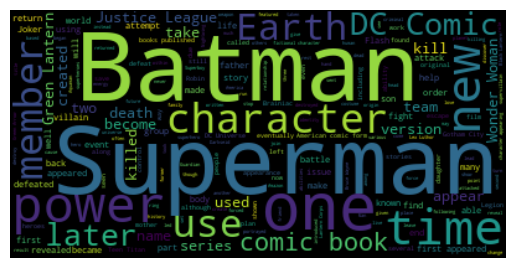

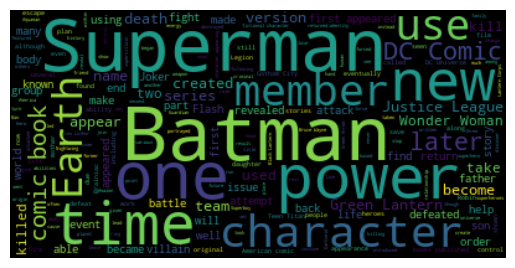

In [32]:
wordcloud = WordCloud().generate(string_dc)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=60).generate(string_dc)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Marvel**

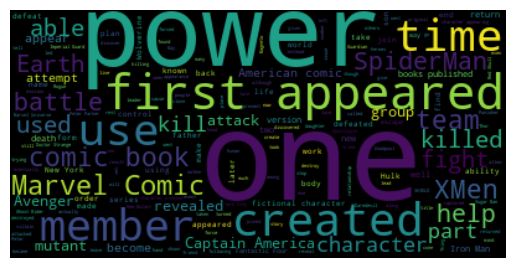

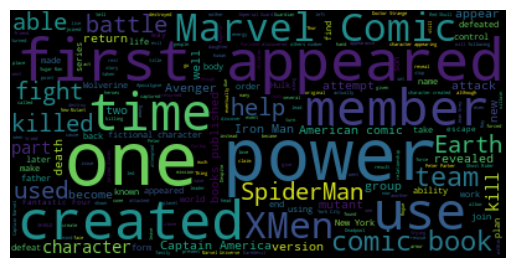

In [33]:
wordcloud = WordCloud().generate(string_marvel)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=60).generate(string_marvel)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Part 4: Community detection


Now, for a short while, it is time to go back to our network! 

Before we begin, let's watch a great lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

(You can watch the old (2015) video [here](https://youtu.be/06GL_KGHdbE/).

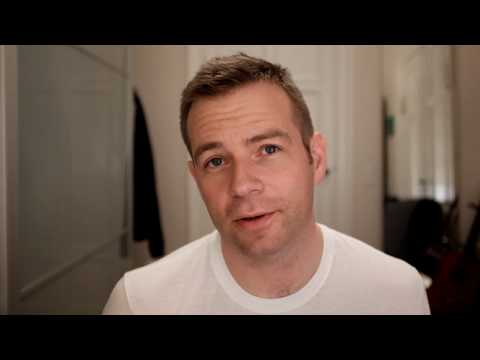

In [34]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

*Exercise 2*: Use the concept of modularity to explore how _community-like_ the universes are.
> 
> * Explain the concept of modularity in your own words.
> * Consider the undirected version of the entire network, including both DC and Marvel.
> * Now create your own partition into communities, where all Marvel-characters are one community and all the DC-characters are another community. That's all you need, **now calculate the modularity of this partition**. Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the universes good communities?
> * Would you expect this result in light of what we have found in the previous exercises?

* Explain the concept of modularity in your own words.

**Ans.** <br> Higher Modularity Implies Better Partition. The higher is M for a partition, the better is the corresponding community structure.

* Consider the undirected version of the entire network, including both DC and Marvel.
* Now create your own partition into communities, where all Marvel-characters are one community and all the DC-characters are another community. That's all you need, **now calculate the modularity of this partition**. Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the universes good communities?

In [37]:
G = nx.DiGraph()

#Function
def FindyourConnection(x):
    connections = re.findall(r'\[\[(.*?)\]\]', str(x))
    for p in range(len(connections)):
        connections[p] = connections[p].partition('|')[0]
        connections[p] = connections[p].replace(" ", "_")
    return connections

#Main
for i in range(len(combine_dir)):
    
    if i < len(dir_list_dc):
    #one character's neighbors(Single point)
        with open('./DC/'+ combine_dir[i]) as f:
            content_in_file = f.readlines()
            connections = FindyourConnection(content_in_file)
            universe = "DC" 
    else:
        with open('./Marvel/'+ combine_dir[i]) as f:
            content_in_file = f.readlines()
            connections = FindyourConnection(content_in_file)
            universe = "Marvel"
    
    #its connections part 
    connections = list(set(connections))
    
    neighbors = []
    for j in range(len(connections)):
        
        if connections[j] in dir_purelist_dc:
            neighbors.append([connections[j], "DC"])
           
        if connections[j] in dir_purelist_marvel:
            neighbors.append([connections[j], "Marvel"])
    
    
    if combine_puredir[i] not in list(G.nodes):
        G.add_node(combine_puredir[i], universe = universe)
    
    for neighbor, universe_n in neighbors:
        if neighbor in list(G.nodes):
            G.add_edge(combine_puredir[i], neighbor)
        else:
            G.add_node(neighbor, universe = universe_n)
            G.add_edge(combine_puredir[i], neighbor)
print(G)

DiGraph with 3112 nodes and 25413 edges


In [39]:
undi_G = G.to_undirected()
print(undi_G)

Graph with 3112 nodes and 21775 edges


In [55]:
dc_calist = [x for x, y in undi_G.nodes(data=True) if y["universe"] == "DC"]
dc_G = undi_G.subgraph(dc_calist).copy()
marvel_calist = [x for x, y in undi_G.nodes(data=True) if y["universe"] == "Marvel"]
marvel_G = undi_G.subgraph(marvel_calist).copy()
print(dc_G)
print(marvel_G)

Graph with 760 nodes and 4294 edges
Graph with 2352 nodes and 17189 edges


In [74]:
dc_degree = list(dc_G.degree)
v = [c for t,c in dc_degree]
kc_dc = sum(v)

marvel_degree = list(marvel_G.degree)
u = [y for x,y in marvel_degree]
kc_marvel = sum(u)

L = len(undi_G.edges)
Lc_dc = len(dc_G.edges)
Lc_marvel = len(marvel_G.edges)

M = Lc_dc/L - (kc_dc/(2*L))**2 + Lc_marvel/L - (kc_marvel/(2*L))**2
print(M)

0.3245638830487675


I will say yes. Both are quite good communities since the value is positive and has reached approximately 0.32.

*Exercise 3*: Community detection, considering each universe separately. 
> * Consider the network of heroes for each universe separately. 
>    - **Note**. For this exercise, it's OK to just pick one of the universes. 
>    - If you want to work with the entire network. Then run community detection on each universe separately, then combine results to get a list containing all communities from both parts of the network.
>    - (The reason for this is that the strong split between Marvel/DC universes can confuse the algorithm a bit).
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities each network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the universes as communities? What does this comparison reveal about them?
    >   * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
    >   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2). This time assign each node a different color based on their _community_. Describe the structure you observe.


In [77]:
dc_G.remove_nodes_from(list(nx.isolates(dc_G))) 
print(dc_G)

Graph with 530 nodes and 4294 edges


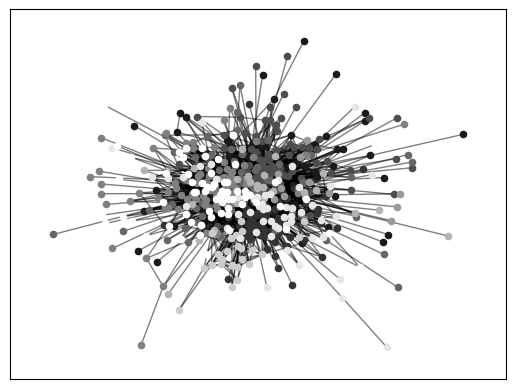

In [78]:
#first compute the best partition
partition = community.best_partition(dc_G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(dc_G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(dc_G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(dc_G,pos, alpha=0.5)
plt.show()

* Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2). This time assign each node a different color based on their _community_. Describe the structure you observe.

100%|██████████████████████████████████████| 2000/2000 [00:07<00:00, 282.59it/s]


BarnesHut Approximation  took  1.87  seconds
Repulsion forces  took  4.65  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.27  seconds


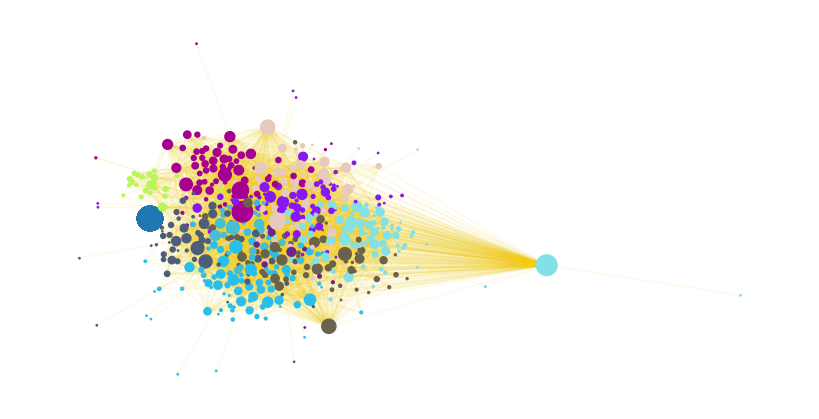

In [121]:
plt.figure(figsize=(8, 4))

degrees = nx.degree(dc_G)

pos = nx.draw_kamada_kawai(dc_G)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=3.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(dc_G, pos=pos, iterations=2000)

colors = []
for i in range(len(set(partition.values()))):
    colors.append("#" "%06x" % random.randint(0, 0xFFFFFF))

    
nx.draw_networkx_nodes(dc_G, positions, 
                       node_size=[degrees[v] for v in dc_G.nodes()], 
                       label=False, 
                       node_color=[colors[x] for x in partition.values()], 
                       alpha=1.0)

nx.draw_networkx_edges(dc_G, positions, edge_color="#f2cc0f", alpha=0.1)
plt.axis('off')
plt.show()

We could see a pattern inside but not very specifically. Most of the colors gathered tightly; however, still, some communities are scattered.

# Part 5: Understanding TF-IDF

Now we jump back into the NLP work. **I emphasize again that it's still OK to work with just one universe**. In this last exercise, we'll be creating word-clouds again. But this time, we'll be using the method from the paper I discuss above: TF-IDF.


*Exercise 4*: Wrap your brain around TF-IDF


First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is that the term frequency doesn't capture just what's special about a text. It also captures words that are just frequent in all text. 

This is clear from the top counts in my Marvel TF list, for example

```
of 1623
comics 1577
marvel 1549
in 1528
and 1520
the 1518
to 1512
a 1511
is 1500
by 1498
was 1473
as 1466
ref 1457
with 1450
first 1447
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's special about a particular text.*** 

To focus on just what's special, TF-IDF has two components: The *term frequency* (TF) and a *weight* (IDF). The weight draws on a larger corpus of text emphasize what's special about the text we're interested in.

Further, there are some extra things going on. For example, there are multiple definitions of TF. Above, we just looked at the raw counts.

> *Action items*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count. <br>

**Ans.** <br> If a word appears in a text more frequently, it means the term is more important than the other which may show up once. According to the general situation, the word has more opportunities to present if the authors want to emphasize or tell the crucial things.

>   * What does IDF stand for? 
>   * How does IDF draw on a larger corpus to extract what's special a certain text? <br>

**Ans.** <br> It prevents the stop words’ “TF value” from being too high because those words always appear in the articles and quite often in one document. Hence, this part is to lower the final value by IDF. We know that those words will always spread in the different documents, so if a word pop up too many times in various texts, that means this word is not “special” and probably meaningless. Therefore, the value of IDF will be low.<br>

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is? <br>

**Ans.** <br>
The central part is still the TF part, and the IDF part gives the weight. Also, a text sometimes includes many words inside, plus numerous documents. The numbers will be enormous, making people hard to compare numbers easily and straightforwardly. Hence, taking “log” is the method that could lower the numbers.

>   * Explain why using IDF makes stopword removal less important. <br>

**Ans.** <br>
Since the meaning of stop wards is the same in every document. It won’t give us some fruitful information that could compare to other documents or present the unique parts of the text.

### Mini digression (OK to skip this section)

The reason we're not doing TF-IDF for Marvel vs DC is that out-of-the box TF-IDF works weirdly when you only have two documents. Let's see why that's the case. If we grab one of the simple definitions of IDF-weight from wikipedia

$$\log \left( \frac{N}{n_t+1} \right) + 1.$$

Where $N = 2$ is the number of documents and $n_t \in \{1,2\}$ is the number of documents containing the term $t$.

> *Action item*
>   * What are the possible weights that a word can have?
>   * Explain in your own words why TF-IDF might not result in ideal wordclods when you only have two documents.

# Part 6: Communities TF-IDF word-clouds

**But wait a minute!** Now we have all of the ingredients for a wonderful cocktail 😎

* We have communities - groups of related nodes in the network. If you're feeling adventurous, you can visualize the network [and give the nodes of each community their own color](https://stackoverflow.com/questions/50828284/networkx-specifying-colors-to-communities-nodes-in-a-graph). That'll give you a sense of whether or not they make sense (are they really). **This visualization is optional**
* And you're an expert on TF-IDF, so you can extract words that characterize a text relative to everything that's going on.
* Finally, you can create nice WordCouds!

So let's put it all together. Let's use TF-IDF and wordcoulds to build a deeper understanding of the top communities.

Thus, the aim of this final part is to create community wordclouds based on TF-IDF. **Once again, you should only work with a single universe (e.g. Marvel or DC).**

You probably have a lot of communities (and there's probably a power-law distribution of sizes), so there are too many communities for us to work with all of them. Let's just grab the 10 largest communities.  

For each community, create a single document for each community consisting of all the cleaned text from all members of the community. So in the end, you should have 10 documents in total.

_Exercise 5_:

> * Now that we have the community-texts, let's start by calculating a the TF list for each community (use whichever version of TF you like). Find the top 5 terms within each universe. 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each community. 
>   * List the 10 top words for each universe accourding to TF-IDF. Are these 10 words more descriptive of the universe than just the TF? Justify your answer.
> * Create a wordcloud for each community. 
> * Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

**TF-DC**

In [164]:
wiki_path = "https://en.wikipedia.org/wiki/"
def wiki_content(ca):
    try:
        source = urlopen(wiki_path + ca).read()
        soup = BeautifulSoup(source, "html.parser")
        #print(set([text.parent.name for text in soup.find_all(text=True)])) #print everything configuration in the "soup"

        # Extract the plain text content from paragraphs
        text = ''
        for paragraph in soup.find_all('p'):
            text += paragraph.text

        #Drop footnote and "\n" in the paragraph
        text = re.sub(r'\[.*?\]+', '', text)
        text = text.replace('\n', '')
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text
    except:
        text = ""
        return text
    
def Make_TF(com):
    com_lower = [w.lower() for w in com]
    com_lower = ''.join(com_lower)
    com_lower = com_lower.split()
    filtered_words = [word for word in com_lower if word not in stopwords.words('english')]

    TF = Counter(filtered_words)
    TF = {k: v/len(filtered_words) for k, v in sorted(dict(TF).items(), key=lambda item: item[1], reverse=True)}
    TF = list(TF.items())
    return TF
    
#Make the community lists
community_0 = ""
community_1 = ""
community_2 = ""
community_3 = ""
community_4 = ""
community_5 = ""
community_6 = ""
community_7 = ""
community_8 = ""
community_9 = ""
  
for key, value in partition.items():
    if value == 0:
        community_0 += wiki_content(key)
    elif value == 1:
        community_1 += wiki_content(key)
    elif value == 2:
        community_2 += wiki_content(key)
    elif value == 3:
        community_3 += wiki_content(key)
    elif value == 4:
        community_4 += wiki_content(key)
    elif value == 5:
        community_5 += wiki_content(key)
    elif value == 6:
        community_6 += wiki_content(key)
    elif value == 7:
        community_7 += wiki_content(key)
    elif value == 8:
        community_8 += wiki_content(key)
    elif value == 9:
        community_9 += wiki_content(key)
    else:
        pass


TF_0 = Make_TF(community_0)
TF_1 = Make_TF(community_1)
TF_2 = Make_TF(community_2)
TF_3 = Make_TF(community_3)
TF_4 = Make_TF(community_4)
TF_5 = Make_TF(community_5)
TF_6 = Make_TF(community_6)
TF_7 = Make_TF(community_7)
TF_8 = Make_TF(community_8)
TF_9 = Make_TF(community_9)

print(TF_0[:5])
print(TF_9[:5])

[('titans', 0.008290724900845797), ('flash', 0.005602809767286281), ('new', 0.005543078319873847), ('dc', 0.004312610503177713), ('first', 0.004181201318870359), ('later', 0.0041692550293878725), ('also', 0.004002006976633058), ('series', 0.0038705977923257037), ('teen', 0.0037869737659482964), ('team', 0.003524155397333588)]
[('wonder', 0.008458646616541353), ('woman', 0.007355761853613626), ('new', 0.005274666257480436), ('dc', 0.00470883842258708), ('later', 0.00441153905171091), ('one', 0.004037517262544116), ('first', 0.004008746355685131), ('superman', 0.004008746355685131), ('black', 0.0034045573116464633), ('also', 0.0033470154979284945)]


In [165]:
print("TF 5 terms in each community: ")
print("TF_1: ", list(zip(*TF_0[:5]))[0])
print("TF_2: ", list(zip(*TF_1[:5]))[0])
print("TF_3: ", list(zip(*TF_2[:5]))[0])
print("TF_4: ", list(zip(*TF_3[:5]))[0])
print("TF_5: ", list(zip(*TF_4[:5]))[0])
print("TF_6: ", list(zip(*TF_5[:5]))[0])
print("TF_7: ", list(zip(*TF_6[:5]))[0])
print("TF_8: ", list(zip(*TF_7[:5]))[0])
print("TF_9: ", list(zip(*TF_8[:5]))[0])
print("TF_10: ", list(zip(*TF_9[:5]))[0])

TF 5 terms in each community: 
TF_1:  ('titans', 'flash', 'new', 'dc', 'first')
TF_2:  ('superman', 'lois', 'luthor', 'comics', 'new')
TF_3:  ('batman', 'series', 'new', 'dc', 'gotham')
TF_4:  ('new', 'later', 'league', 'dc', 'justice')
TF_5:  ('dc', 'new', 'black', 'marvel', 'first')
TF_6:  ('black', 'lightning', 'dc', 'first', 'character')
TF_7:  ('time', 'new', 'justice', 'series', 'atom')
TF_8:  ('legion', 'boy', 'brainiac', 'superheroes', 'manhattan')
TF_9:  ('lantern', 'green', 'corps', 'power', 'first')
TF_10:  ('wonder', 'woman', 'new', 'dc', 'later')


* Next, calculate IDF for every word in every list (use whichever version of IDF you like).

**IDF-DC**

In [173]:
wiki_path = "https://en.wikipedia.org/wiki/"
string_dc = ""
for ca in dir_purelist_dc:
    try:
        source = urlopen(wiki_path + ca).read()
        soup = BeautifulSoup(source, "html.parser")
        #print(set([text.parent.name for text in soup.find_all(text=True)])) #print everything configuration in the "soup"

        # Extract the plain text content from paragraphs
        text = ''
        for paragraph in soup.find_all('p'):
            text += paragraph.text

        #Drop footnote and "\n" in the paragraph
        text = re.sub(r'\[.*?\]+', '', text)
        text = text.replace('\n', '')
        text = text.translate(str.maketrans('', '', string.punctuation))
        string_dc += text
    except:
        pass

string_dc_lower = [w.lower() for w in string_dc]
string_dc_lower = ''.join(string_dc_lower)
string_dc_lower = string_dc_lower.split()
filtered_words = [word for word in string_dc_lower if word not in stopwords.words('english')]
list_word_dc = list(set(filtered_words))
print(list_word_dc[:5])

['simulator', 'concernedin', 'buckner', 'eightinch', 'coppell']


In [ ]:
N = len(set(partition.values))

def idf(count):
    idf = math.log(N/count, 10)
    return idf

for word in list_word_dc:
    if word in 